In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt 
import numpy as np 
import scipy as sp
import pandas as pd 
from astropy.stats import sigma_clip
from scipy.optimize import curve_fit


In [2]:
cubo = fits.open('/Users/isidoramancilla/Documents/Universidad/Quinto semestre/Astronomía Experimental/Tarea_2_Cinem_tica_Gal_ctica/southgal_fixbadc.fits')
data = cubo[0].data
header = cubo[0].header

In [3]:
def values(h,j):
    N = h['NAXIS'+str(j)];
    val = np.zeros(N)
    for i in range(N):
        val[i] = (i + 1 - float(h['CRPIX' + str(j)])) * float(h['CDELT' + str(j)]) + float(h['CRVAL' + str(j)])
    return val

In [4]:
velocidad = values(header, 1)
longitud = values(header, 2)
latitud = values(header, 3)

In [5]:
columns = ['longitud l', 'latitud b', 'v_tan']
tabla = pd.DataFrame(columns=columns)

for i_b in range(len(latitud)):
    for i_l in range(len(longitud)):
        T = data[i_b][i_l][:]
        r = sigma_clip(T, sigma_lower=5, sigma_upper=5)
        rms = np.sqrt(np.mean(r**2))
        rmask = r.mask
        if len(velocidad[rmask])==0:
            v_tan = np.nan
        else:
            v_tan = velocidad[rmask][0]
        
        tabla = tabla.append({'longitud l':longitud[i_l], 'latitud b':latitud[i_b], 'v_tan':v_tan}, ignore_index=True) 

In [6]:
type(longitud)

numpy.ndarray

In [7]:
vmin = np.array([])
bvmin = np.array([])
R = np.array([])
Z = np.array([])
R0 = 8.5 #kPc
vsol=220

for lon in longitud:
    table_b_fix = tabla.loc[tabla['longitud l'] == lon]
    min_vel= table_b_fix['v_tan'].min()
    bmin = table_b_fix.loc[table_b_fix['v_tan'] == min_vel, 'latitud b'].iloc[0]
    vmin = np.append(vmin, min_vel)
    bvmin = np.append(bvmin, bmin)
    R_i = np.abs(R0 * np.sin(lon * np.pi / 180))
    Z_i = bmin * np.pi / 180 * R0 * np.cos(lon * np.pi / 180)
    R = np.append(R, R_i)
    Z = np.append(Z, Z_i)
    
vR = vmin * (np.abs(np.sin(longitud * np.pi / 180))
                   / np.sin(longitud * np.pi / 180)) + np.abs(vsol * np.sin (longitud * np.pi / 180))


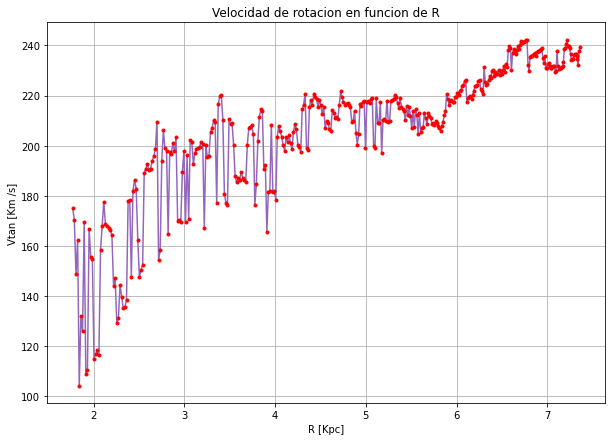

In [8]:
plt.figure(figsize = (10, 7))
plt.plot(R,vR, 'tab:purple')
plt.plot(R,vR, 'r.')
plt.grid()
plt.title("Velocidad de rotacion en funcion de R")
plt.xlabel("R [Kpc]")
plt.ylabel("Vtan [Km /s]")
plt.savefig('rotacionv.png')

In [9]:
R0_km = R0 * 3.0857 * 10e16
wsol = vsol / R0_km
wR = vmin / (R0_km * np.sin(longitud * np.pi / 180)) + wsol

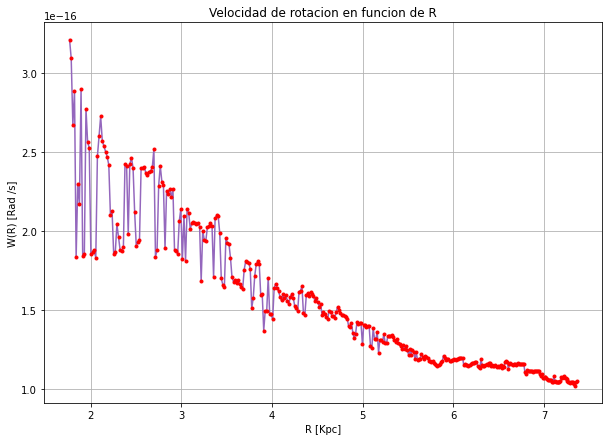

In [10]:
plt.figure(figsize = (10, 7))
plt.plot(R,wR, 'tab:purple')
plt.plot(R,wR, 'r.')
plt.grid()
plt.title("Velocidad de rotacion en funcion de R")
plt.xlabel("R [Kpc]")
plt.ylabel("W(R) [Rad /s]")
plt.savefig('rotacionw.png')

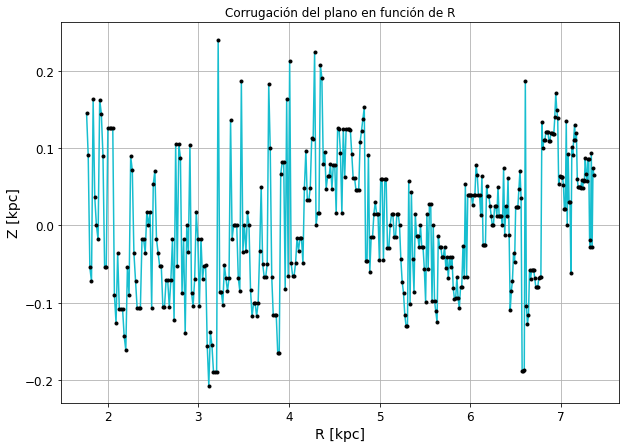

In [11]:
plt.figure(figsize = (10, 7))
plt.plot(R,Z, 'tab:cyan')
plt.plot(R,Z, 'k.')
plt.grid()
plt.title("Corrugación del plano en función de R")
plt.xlabel("R [kpc]", fontsize='14')
plt.ylabel("Z [kpc]", fontsize='14')
plt.tick_params(labelsize='12')
plt.savefig('corrugacion.png')

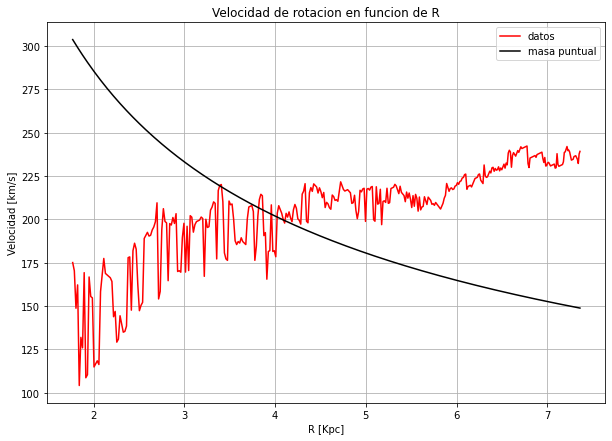

In [12]:
G=4.302e-6

def masapuntual(R,M0):
    M=M0
    v=np.sqrt(G*M/R)
    return v

mpuntual,covmpuntual=curve_fit(masapuntual, R, vR)

plt.figure(figsize = (10, 7))
plt.plot(R,vR,'red',label='datos')
plt.plot(R,masapuntual(R,mpuntual[0]),'k',label='masa puntual')
plt.title("Velocidad de rotacion en funcion de R")
plt.xlabel('R [Kpc]')
plt.ylabel('Velocidad [km/s]')
plt.grid()
plt.legend()
plt.savefig('masapuntual.png')

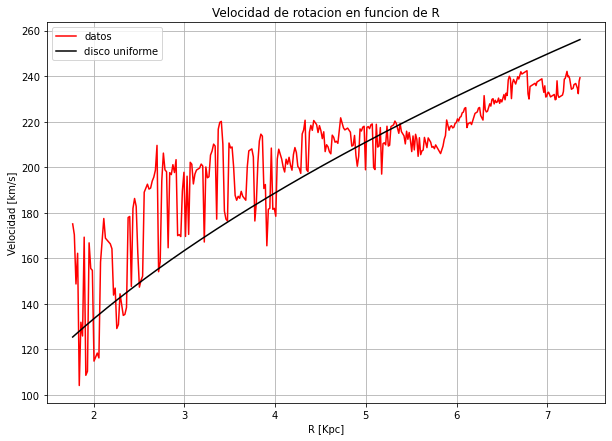

In [13]:
def disco(R, S):
    M = np.pi * R ** 2 * S
    v=np.sqrt(G * M / R)
    return v

disc, covdisc = curve_fit(disco, R, vR)

plt.figure(figsize=(10, 7))
plt.plot(R,vR,'red',label='datos')
plt.plot(R,disco(R,disc[0]),'k',label='disco uniforme')
plt.title("Velocidad de rotacion en funcion de R")
plt.xlabel('R [Kpc]')
plt.ylabel('Velocidad [km/s]')
plt.grid()
plt.legend()
plt.savefig('disco.png')

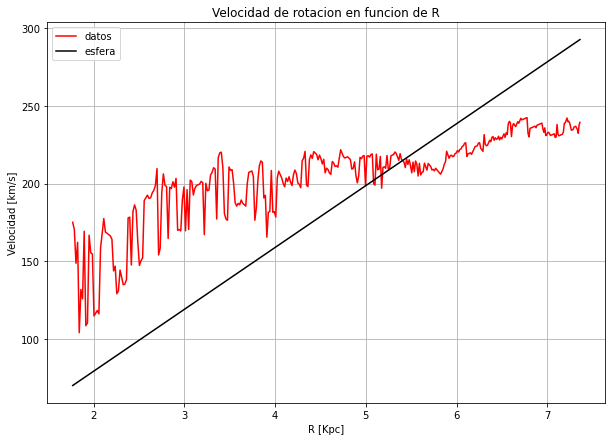

In [14]:
def esfera(R, rho):
    M = 4 / 3 * np.pi * R ** 3 * rho
    v=np.sqrt(G*M/R)
    return v

esf, covesf = curve_fit(esfera, R, vR)

plt.figure(figsize=(10, 7))
plt.plot(R,vR,'red',label='datos')
plt.plot(R,esfera(R,esf[0]),'k',label='esfera')
plt.title("Velocidad de rotacion en funcion de R")
plt.xlabel('R [Kpc]')
plt.ylabel('Velocidad [km/s]')
plt.grid()
plt.legend()
plt.savefig('esfera uniforme.png')
    


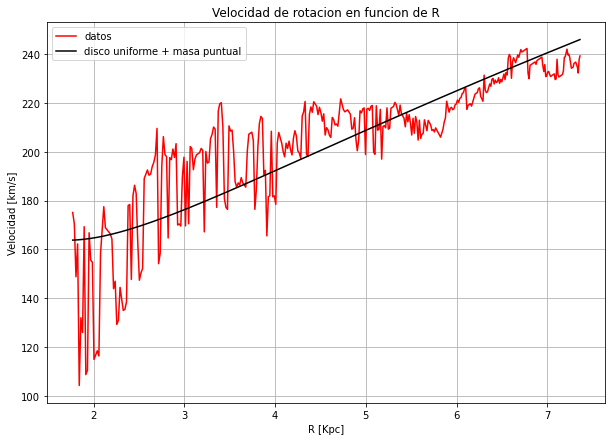

In [15]:
def disco_masa_puntual(R, M0, S):
    M = M0 + np.pi * (R ** 2) * S
    v=np.sqrt(G * M / R)
    return v

disc_mpuntual, covdisc_mpuntual = curve_fit(disco_masa_puntual, R, vR)

plt.figure(figsize=(10,7))
plt.plot(R,vR,'red',label='datos')
plt.plot(R,disco_masa_puntual(R,disc_mpuntual[0], disc_mpuntual[1]),'k',label='disco uniforme + masa puntual')
plt.title("Velocidad de rotacion en funcion de R")
plt.xlabel('R [Kpc]')
plt.ylabel('Velocidad [km/s]')
plt.grid()
plt.legend()
plt.savefig('disco_mpuntual.png')

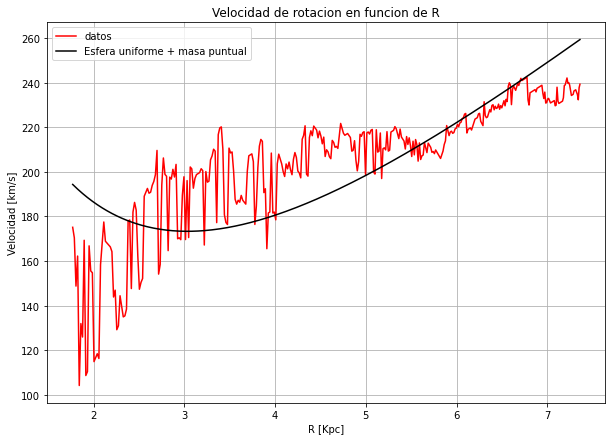

In [16]:
def esfera_masa_puntual(R, M0, rho):
    M = 4 / 3 * np.pi * R ** 3 * rho + M0
    v=np.sqrt(G*M/R)
    return v

esf_mpuntual, covesf_mpuntual = curve_fit(esfera_masa_puntual, R, vR)

plt.figure(figsize=(10, 7))
plt.plot(R,vR,'red',label='datos')
plt.plot(R,esfera_masa_puntual(R,esf_mpuntual[0], esf_mpuntual[1]),'k',label='Esfera uniforme + masa puntual')
plt.title("Velocidad de rotacion en funcion de R")
plt.xlabel('R [Kpc]')
plt.ylabel('Velocidad [km/s]')
plt.grid()
plt.legend()
plt.savefig('esfera_mpuntual.png')